# 1. 地理空間データ

##1.1 地理空間データのハンドリング（1）

In [1]:
# GoogleDriveのマウント
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [2]:
# ワーキングディレクトリの設定
%cd '/content/mount/MyDrive/SDS'

/content/mount/MyDrive/SDS


In [3]:
# geopandasのインストール
!pip install -q geopandas

In [4]:
# 必要なライブラリのインポート
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# ファイルパスの設定
DISTRICT_PATH = "./Chapter1/data/N03-20220101_27_GML/N03-22_27_220101.shp" # ".geojsonファイルでもよい"
LAND_PATH = "./Chapter1/data/L01-23_27_GML/L01-23_27.shp"

In [6]:
# shpファイル読込
# ポリゴン（行政区域データ）
gdf_district = gpd.read_file(DISTRICT_PATH) # Shapefile読込
# ポイント（地価公示データ）
gdf_land = gpd.read_file(LAND_PATH) # Shapefile読込

In [7]:
gdf_district.crs

<Geographic 2D CRS: EPSG:6668>
Name: JGD2011
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
gdf_land.crs

<Geographic 2D CRS: EPSG:4612>
Name: JGD2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
# 変換後の空間座標系指定
# JGD2000緯度経度(EPSG4612) → JGD2011緯度経度(EPSG6668)）
dst_proj = 6668 # 変換後の座標系のEPSGコードを指定
# 地価公示データのgeopandasデータフレームについて空間座標系を一括変換
# to_crs()関数を用いて、引数で空間座標系のEPSGコードを指定
gdf_land = gdf_land.to_crs(epsg=dst_proj)

In [11]:
# 行政区域データの確認
gdf_district.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,大阪府,None,None,None,None,"MULTIPOLYGON (((135.09176 34.31282, 135.09174 ..."
1,大阪府,None,大阪市,都島区,27102,"POLYGON ((135.51481 34.72057, 135.51489 34.720..."
2,大阪府,None,大阪市,福島区,27103,"POLYGON ((135.48403 34.69969, 135.48404 34.699..."
3,大阪府,None,大阪市,此花区,27104,"POLYGON ((135.35833 34.62786, 135.35860 34.627..."
4,大阪府,None,大阪市,此花区,27104,"POLYGON ((135.39884 34.65724, 135.39877 34.657..."


In [12]:
# 0番目のインデックス(行)の削除
gdf_district = gdf_district.drop(index = 0)
# 必要な列のみで再構成
gdf_district = gdf_district[['N03_003', 'N03_004', 'N03_007', 'geometry']]
# 列名の付け直し
gdf_district.columns = ['city1', 'city2', 'd_code', 'geometry']
# 行政区域データの再確認
gdf_district.head()

,city1,city2,d_code,geometry
1,大阪市,都島区,27102,"POLYGON ((135.51481 34.72057, 135.51489 34.720..."
2,大阪市,福島区,27103,"POLYGON ((135.48403 34.69969, 135.48404 34.699..."
3,大阪市,此花区,27104,"POLYGON ((135.35833 34.62786, 135.35860 34.627..."
4,大阪市,此花区,27104,"POLYGON ((135.39884 34.65724, 135.39877 34.657..."
5,大阪市,此花区,27104,"POLYGON ((135.39893 34.65737, 135.39892 34.657..."


In [13]:
# 地価公示データの確認
gdf_land.head()

,L01_001,L01_002,L01_003,L01_004,L01_005,L01_006,L01_007,L01_008,L01_009,L01_010,...,L01_133,L01_134,L01_135,L01_136,L01_137,L01_138,L01_139,L01_140,L01_141,geometry
0,000,001,000,001,2023,197000,1.0,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,POINT (135.52472 34.72501)
1,000,002,000,002,2023,281000,4.1,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (135.53445 34.71340)
2,000,003,000,003,2023,322000,4.9,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (135.53287 34.70975)
3,000,004,000,004,2023,304000,4.1,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (135.52604 34.70063)
4,000,005,000,005,2023,308000,4.1,1,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (135.53295 34.70401)


In [14]:
# 必要な列のみで再構成
gdf_land = gdf_land[['L01_024', 'L01_022', 'L01_006', 'geometry']]
# 列名の付け直し
gdf_land.columns = ['address', 'd_code', 'price', 'geometry']
# 地価公示データの再確認
gdf_land.head()

,address,d_code,price,geometry
0,大阪府 大阪市都島区毛馬町５丁目２３番,27102,197000,POINT (135.52472 34.72501)
1,大阪府 大阪市都島区御幸町１丁目９４番２,27102,281000,POINT (135.53445 34.71340)
2,大阪府 大阪市都島区都島北通２丁目１５７番,27102,322000,POINT (135.53287 34.70975)
3,大阪府 大阪市都島区中野町２丁目９３番,27102,304000,POINT (135.52604 34.70063)
4,大阪府 大阪市都島区都島中通２丁目１０１番,27102,308000,POINT (135.53295 34.70401)


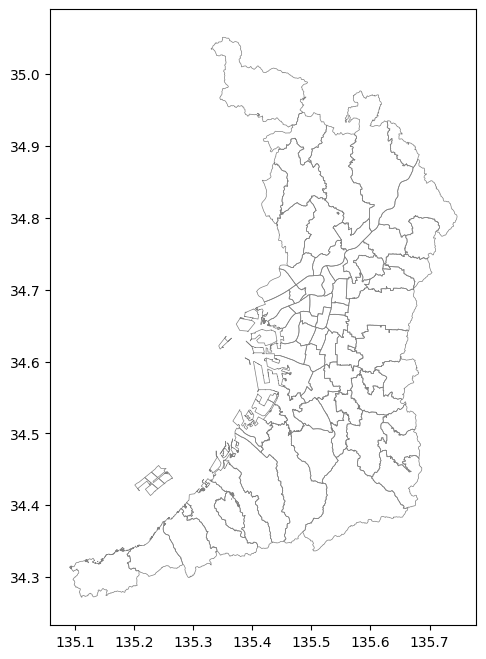

In [15]:
# figureとaxを生成
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# 行政区域の境界のみ描画(.boundary.plot()メソッド)
gdf_district.boundary.plot(ax = ax, # axの指定
                           linewidth=0.5, # 境界線の太さを指定
                           edgecolor='grey' # 境界線の色を指定
                          )
# 図の保存
fig.savefig("./Chapter1/figures/figure1_1")
# 図の表示
plt.show()

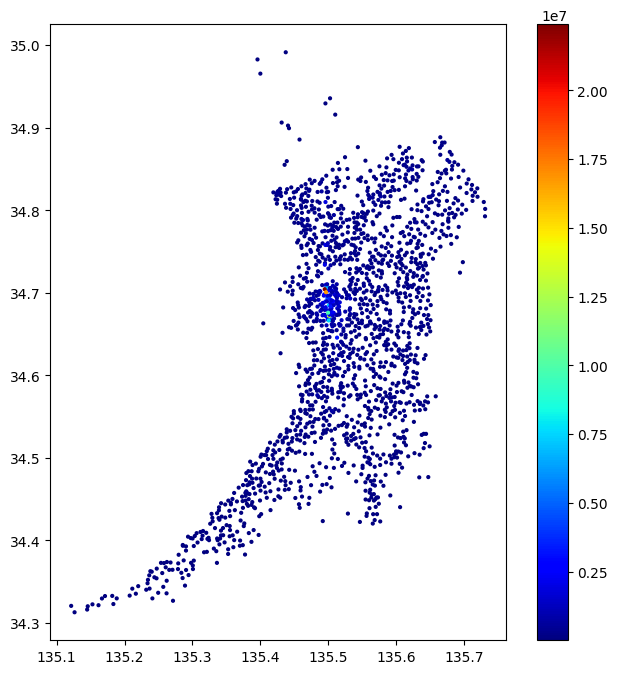

In [16]:
# figureとaxを生成
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# 地価分布図のみ描画
gdf_land.plot(ax = ax, # axの指定
              column = 'price', # 色分け対象の列(地価)
              cmap = 'jet', # 色分けのカラーマップ
              legend = True, # 凡例(カラーバー)の表示
              s = 4 # 点の大きさ
              )
# 図の保存
fig.savefig("./Chapter1/figures/figure1_2")
# 図の表示
plt.show()

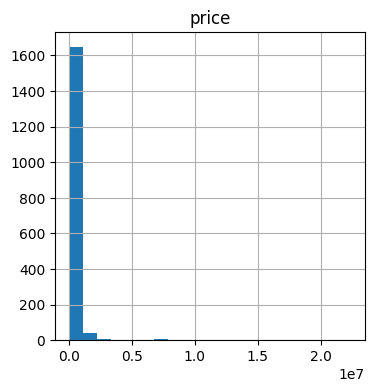

In [17]:
# figureとaxを生成
fig, ax = plt.subplots(1,1,figsize=(4,4))
# hist関数(第1引数に対象データ列、 binsで帯の数を指定)
gdf_land.hist('price',bins=20, ax=ax)
# 図の保存
fig.savefig("./Chapter1/figures/figure1_3")
# 図の表示
plt.show()

In [18]:
# np.log()で対数変換し、
# geopandasデータフレームに新たな列(log_price)として追加
gdf_land['log_price'] = np.log(gdf_land['price'])
gdf_land.head()

,address,d_code,price,geometry,log_price
0,大阪府 大阪市都島区毛馬町５丁目２３番,27102,197000,POINT (135.52472 34.72501),12.190959
1,大阪府 大阪市都島区御幸町１丁目９４番２,27102,281000,POINT (135.53445 34.71340),12.546110
2,大阪府 大阪市都島区都島北通２丁目１５７番,27102,322000,POINT (135.53287 34.70975),12.682307
3,大阪府 大阪市都島区中野町２丁目９３番,27102,304000,POINT (135.52604 34.70063),12.624783
4,大阪府 大阪市都島区都島中通２丁目１０１番,27102,308000,POINT (135.53295 34.70401),12.637855


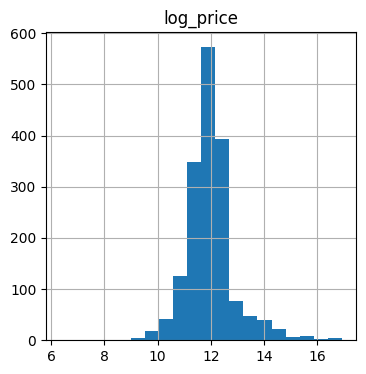

In [19]:
# figureとaxを生成
fig, ax = plt.subplots(1,1,figsize=(4,4))
# hist関数(第1引数に対象データ列、 binsで帯の数を指定)
gdf_land.hist('log_price',bins=20, ax=ax)
# 図の保存
fig.savefig("./Chapter1/figures/figure1_4")
# 図の表示
plt.show()

In [20]:
# log_priceの記述統計量
gdf_land['log_price'].describe()

count    1715.000000
mean       11.974100
std         0.911999
min         6.345636
25%        11.507913
50%        11.918391
75%        12.305918
max        16.924572
Name: log_price, dtype: float64

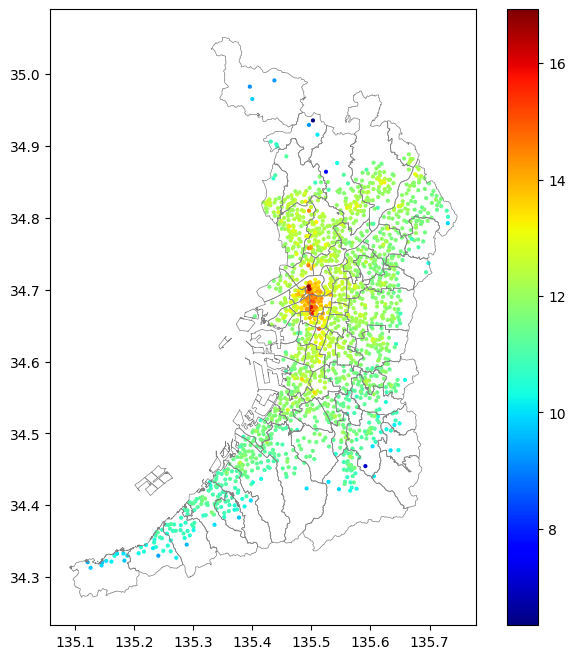

In [21]:
# figureとaxを生成
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# 行政区域地図を描画の下地(base)とする
base = gdf_district.boundary.plot(ax = ax, # axの指定
                                  linewidth=0.5, # 境界線の太さを指定
                                  edgecolor='grey' # 境界線の色を指定
                                  )
# 行政区域地図の上に地価分布図を重ね合わせる
gdf_land.plot(ax = base, # 描画の下地にbaseを指定
              column = 'log_price', # 色分け対象の列(対数値の地価)
              cmap = 'jet', # 色分けのカラーマップ
              legend = True, # 凡例(カラーバー)の表示
              s = 4 # 点の大きさ
              )
# 図の保存
fig.savefig("./Chapter1/figures/figure1_5")
# 図の表示
plt.show()

In [22]:
# 地域コードをもとにグループを作る
grouped = gdf_land.groupby('d_code')
# グループ内の項目(列)の平均値を求めて新しいpandasデータフレームを作成
price_mean_df = grouped.mean()

<ipython-input-22-289eef484765>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_mean_df = grouped.mean()


In [23]:
# 新しいデータフレームの'log_price'列を行政区域データフレームに結合
gdf_district = gdf_district.merge(price_mean_df['log_price'], on = 'd_code')
# 行政区域データフレームの確認
gdf_district.head()

,city1,city2,d_code,geometry,log_price
0,大阪市,都島区,27102,"POLYGON ((135.51481 34.72057, 135.51489 34.720...",12.769969
1,大阪市,福島区,27103,"POLYGON ((135.48403 34.69969, 135.48404 34.699...",13.214822
2,大阪市,此花区,27104,"POLYGON ((135.35833 34.62786, 135.35860 34.627...",12.191524
3,大阪市,此花区,27104,"POLYGON ((135.39884 34.65724, 135.39877 34.657...",12.191524
4,大阪市,此花区,27104,"POLYGON ((135.39893 34.65737, 135.39892 34.657...",12.191524


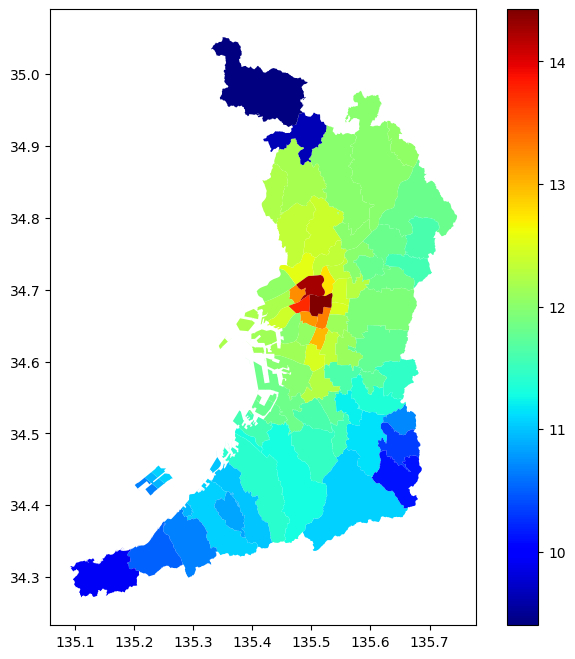

In [24]:
# figureとaxを生成
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# 行政区域地図の上に地価分布図を重ね合わせる
gdf_district.plot(ax = ax,
                  column = 'log_price', # 色分け対象の列(対数値の地価)
                  cmap = 'jet', # 色分けのカラーマップ
                  legend = True # 凡例(カラーバー)の表示
                  )
# 図の保存
fig.savefig("./Chapter1/figures/figure1_6")
# 図の表示
plt.show()

In [25]:
# 大阪市に絞る
gdf_osaka_city = gdf_district[gdf_district['city1'] == '大阪市']
gdf_osaka_city.head()

,city1,city2,d_code,geometry,log_price
0,大阪市,都島区,27102,"POLYGON ((135.51481 34.72057, 135.51489 34.720...",12.769969
1,大阪市,福島区,27103,"POLYGON ((135.48403 34.69969, 135.48404 34.699...",13.214822
2,大阪市,此花区,27104,"POLYGON ((135.35833 34.62786, 135.35860 34.627...",12.191524
3,大阪市,此花区,27104,"POLYGON ((135.39884 34.65724, 135.39877 34.657...",12.191524
4,大阪市,此花区,27104,"POLYGON ((135.39893 34.65737, 135.39892 34.657...",12.191524


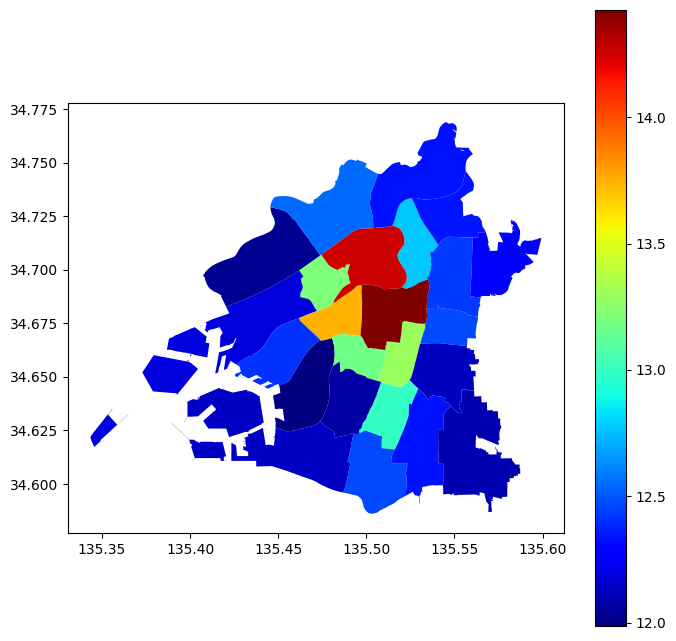

In [26]:
# figureとaxを生成
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# 行政区域地図の上に地価分布図を重ね合わせる
gdf_osaka_city.plot(ax = ax,
                    column = 'log_price', # 色分け対象の列(対数値の地価)
                    cmap = 'jet', # 色分けのカラーマップ
                    legend = True # 凡例(カラーバー)の表示
                    )
# 図の保存
fig.savefig("./Chapter1/figures/figure1_7")
# 図の表示
plt.show()